<a href="https://colab.research.google.com/github/gurram46/K-Nearest-Neighbours/blob/main/K_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('Zoo.csv')

In [ ]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Data Preprocessing

In [ ]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

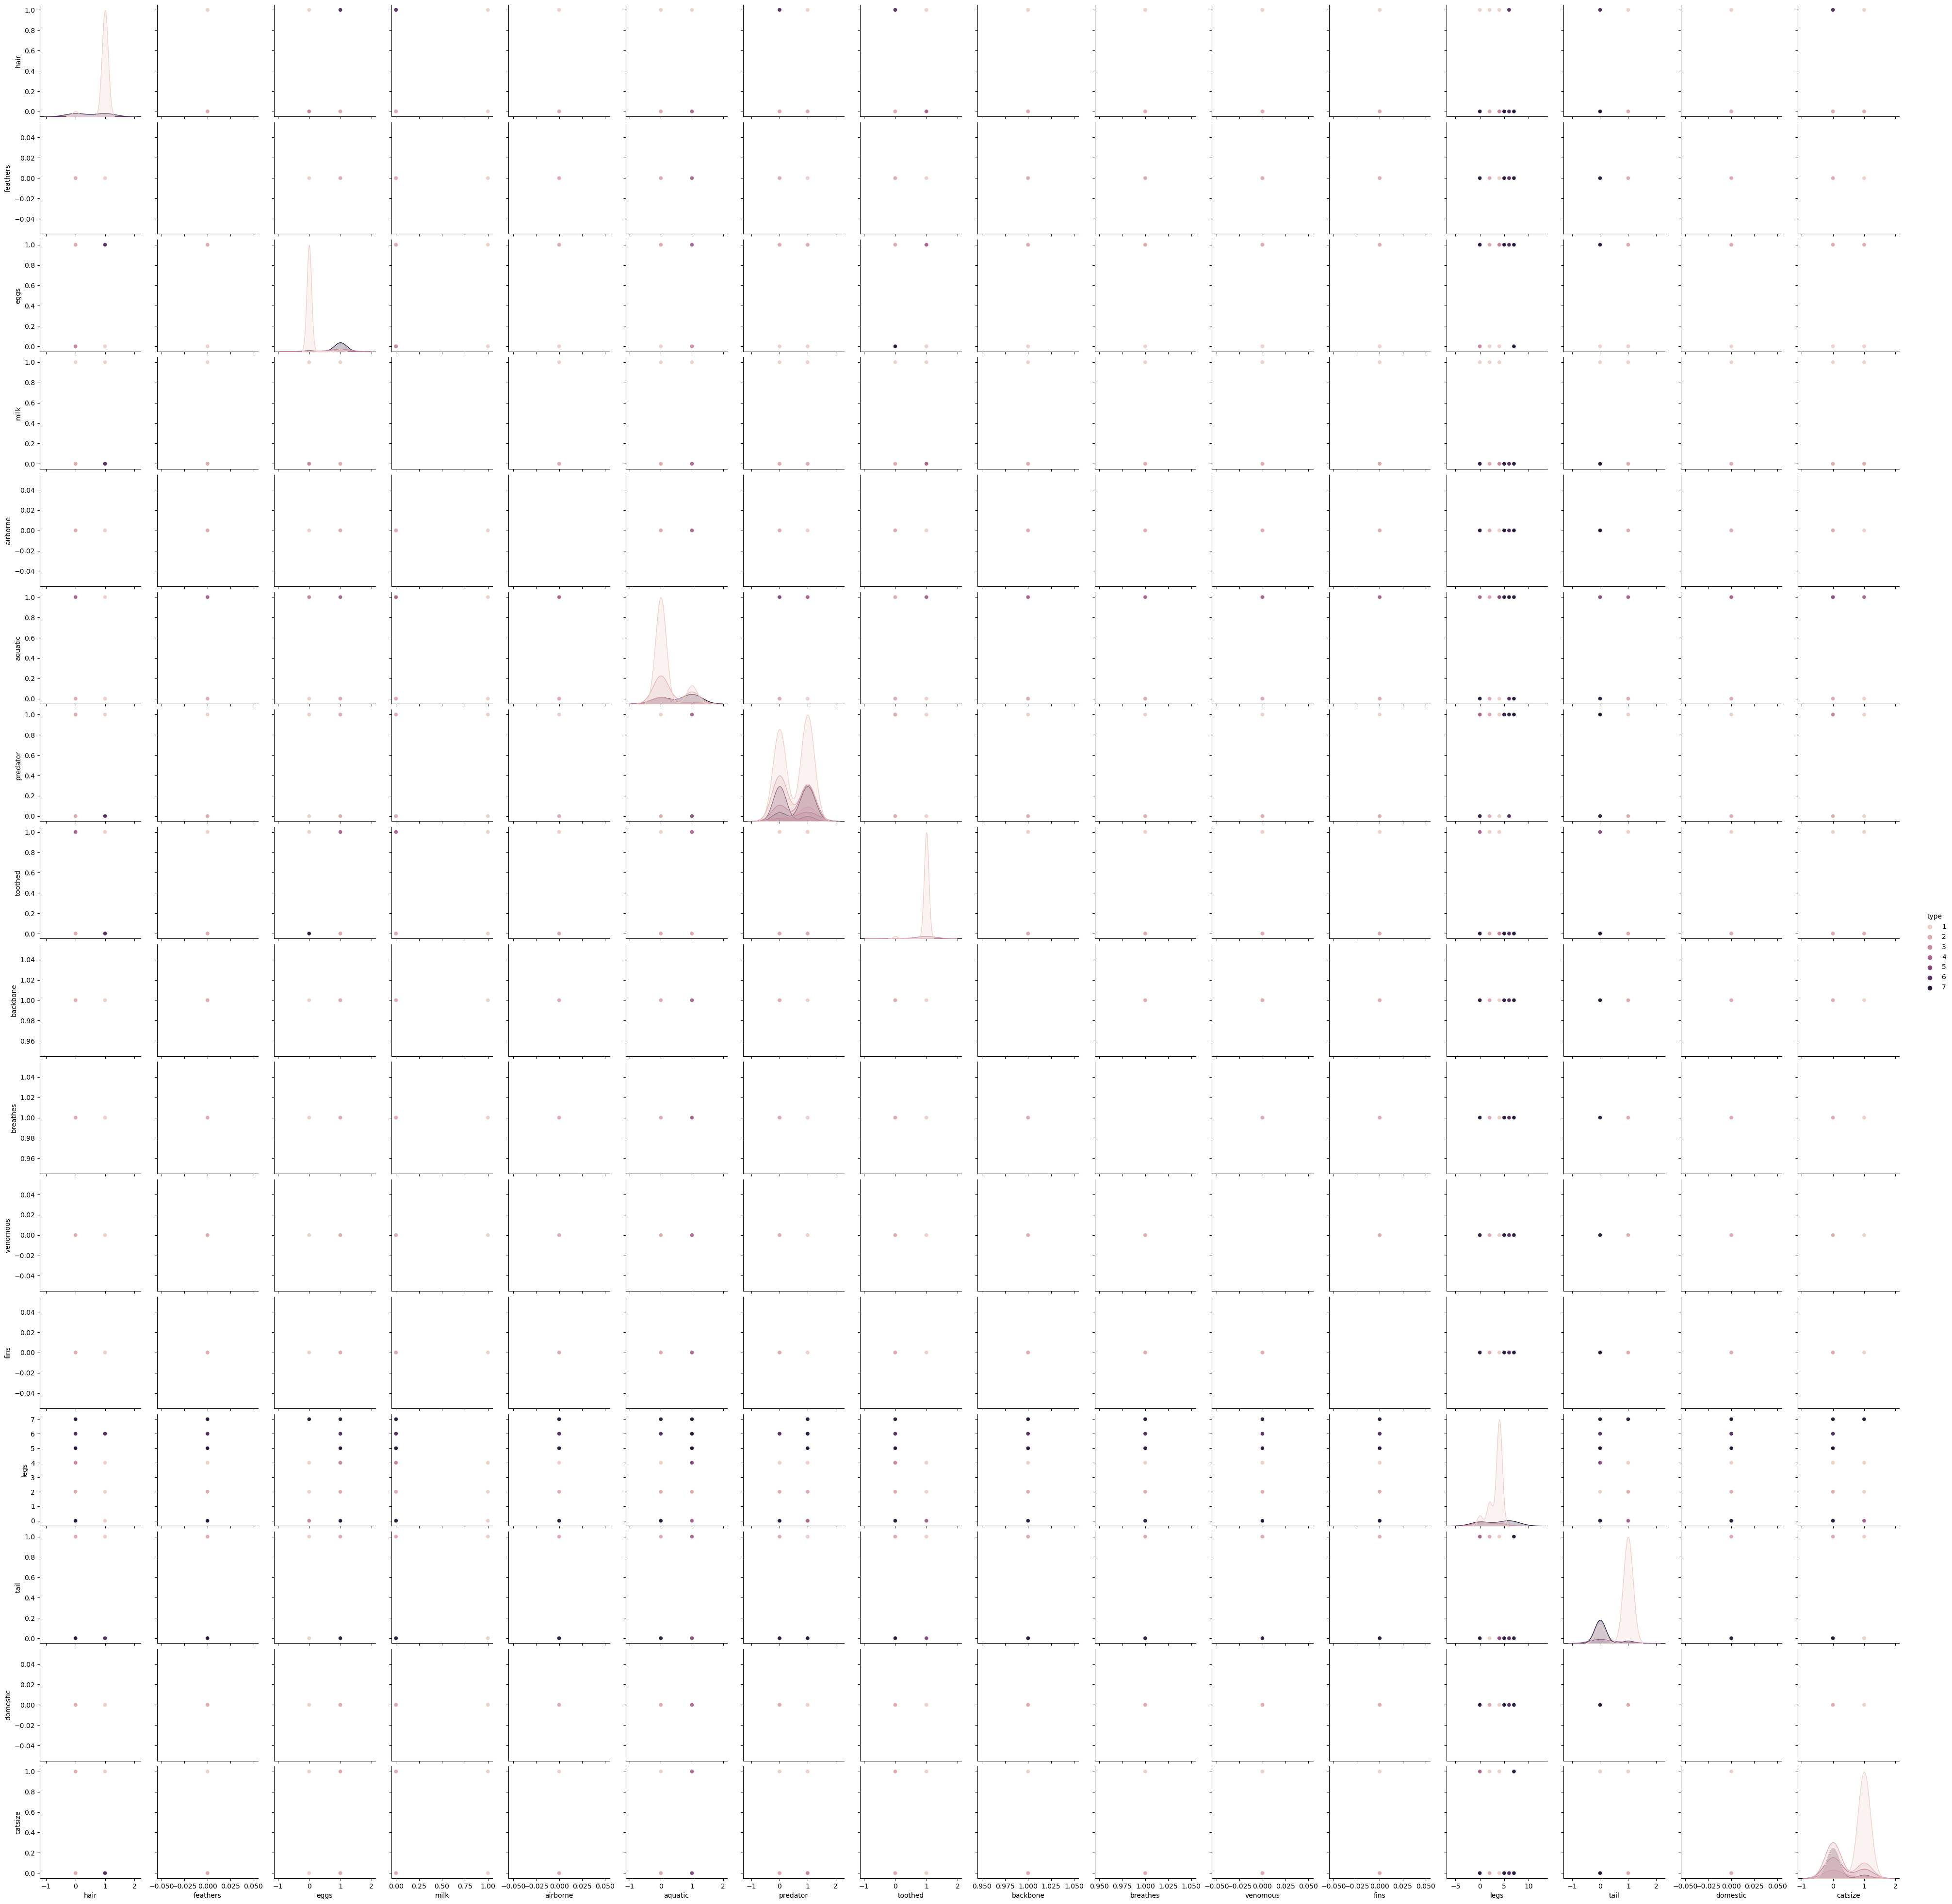

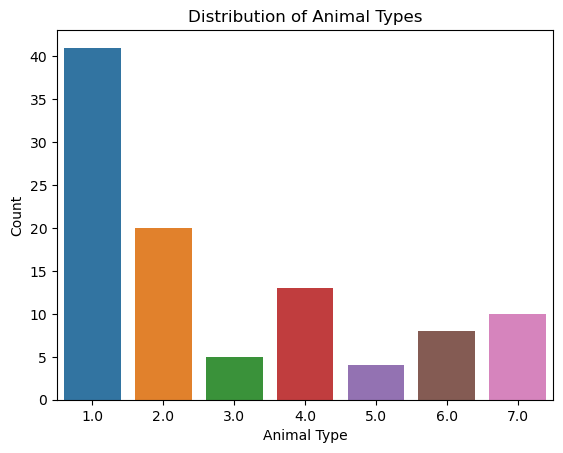

In [ ]:
sns.pairplot(data, hue='type', diag_kind='kde')
plt.show()

sns.countplot(x='type', data=data)
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.title('Distribution of Animal Types')
plt.show()


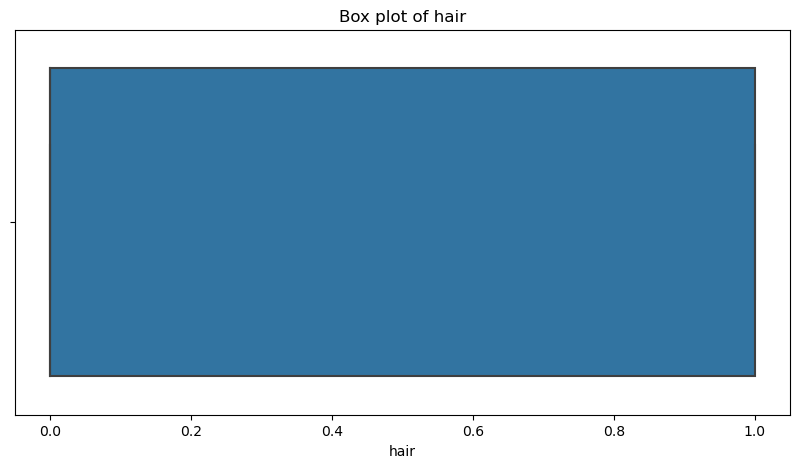

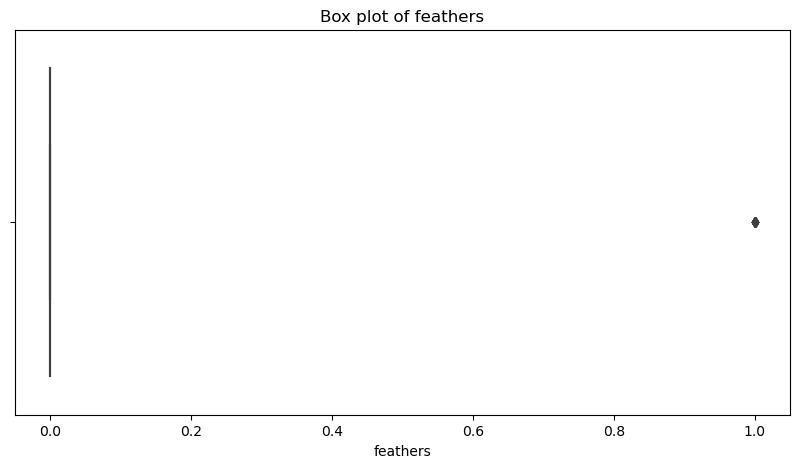

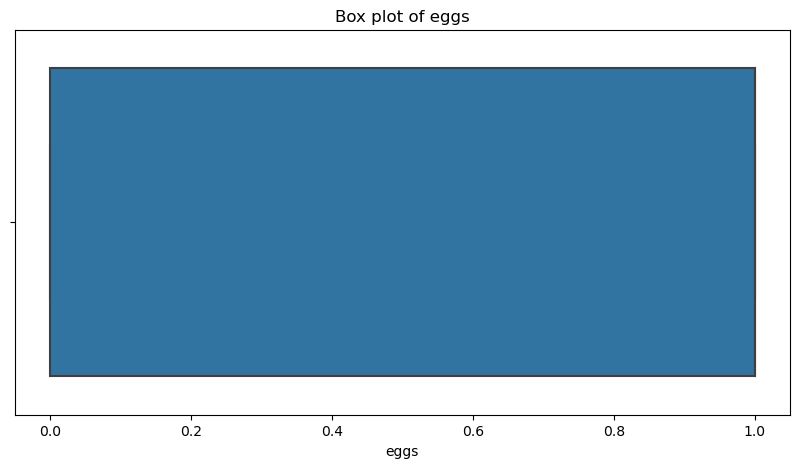

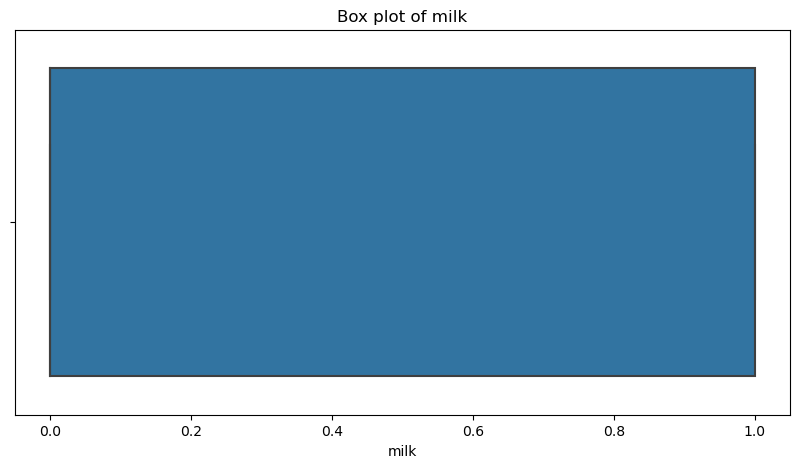

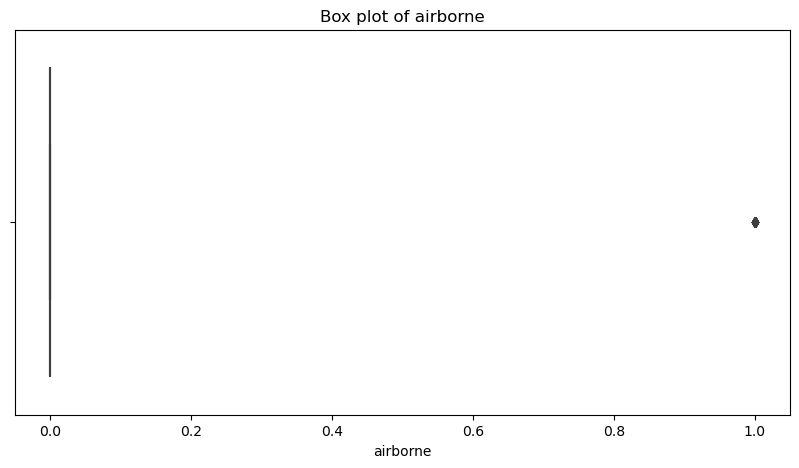

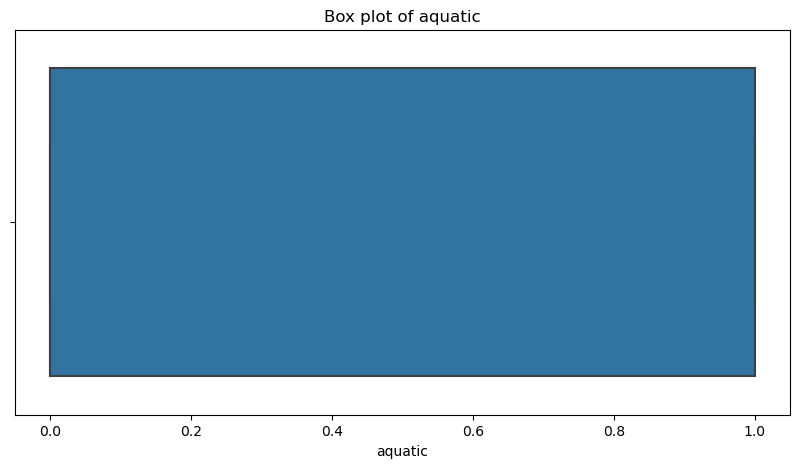

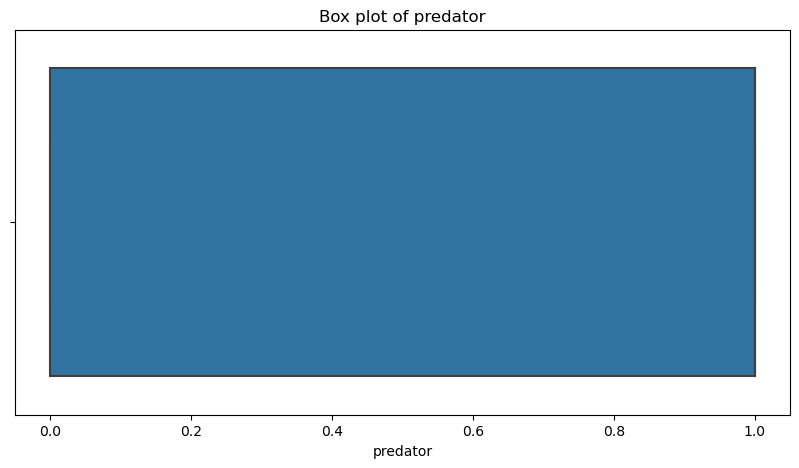

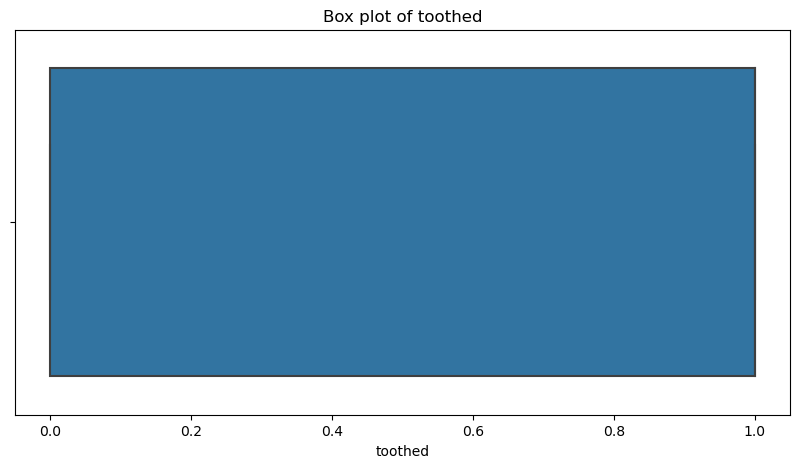

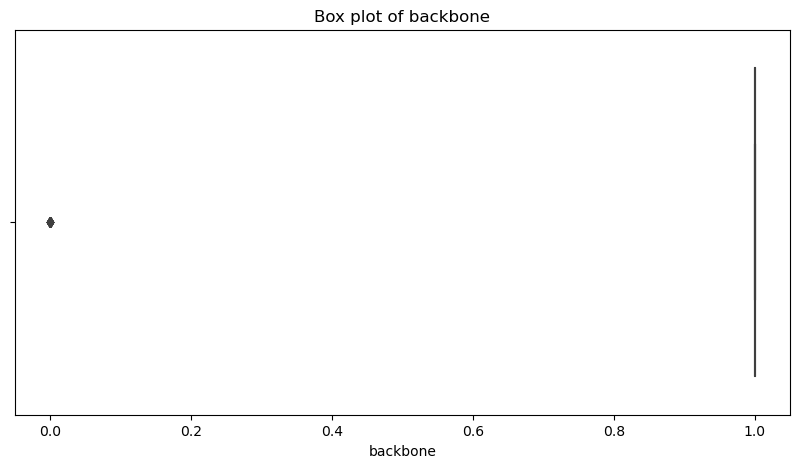

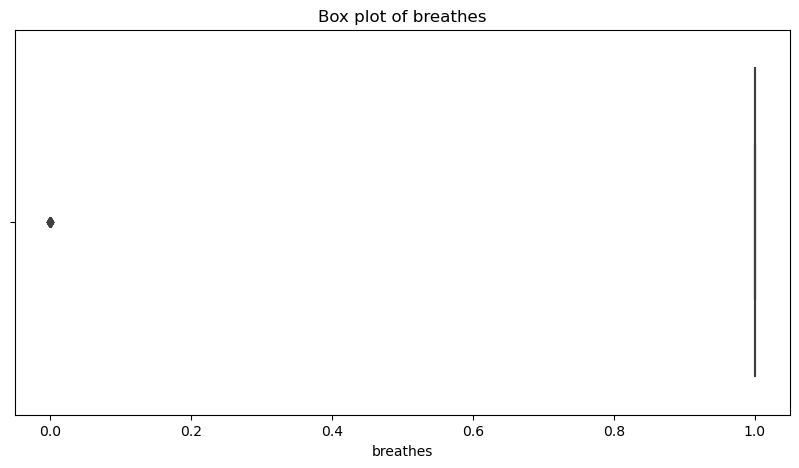

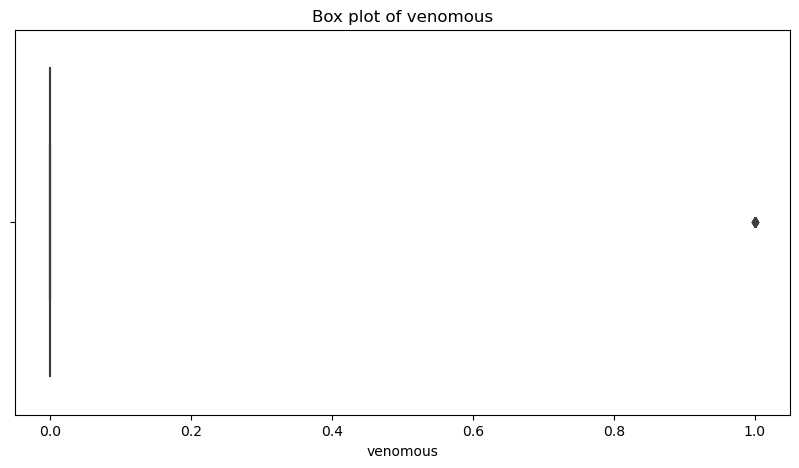

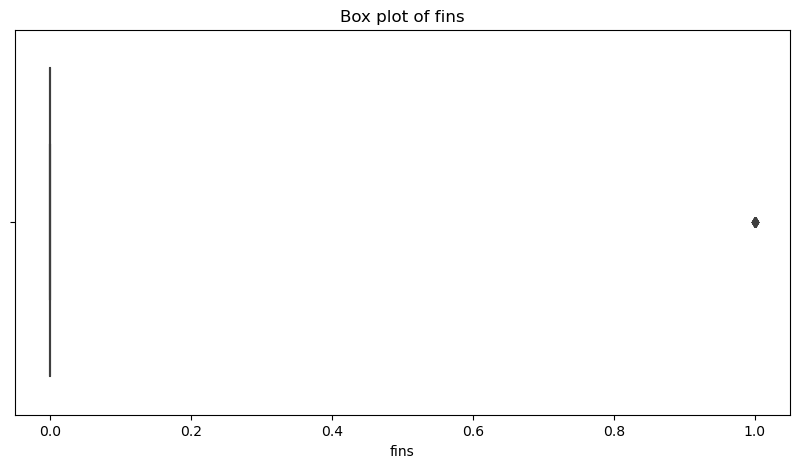

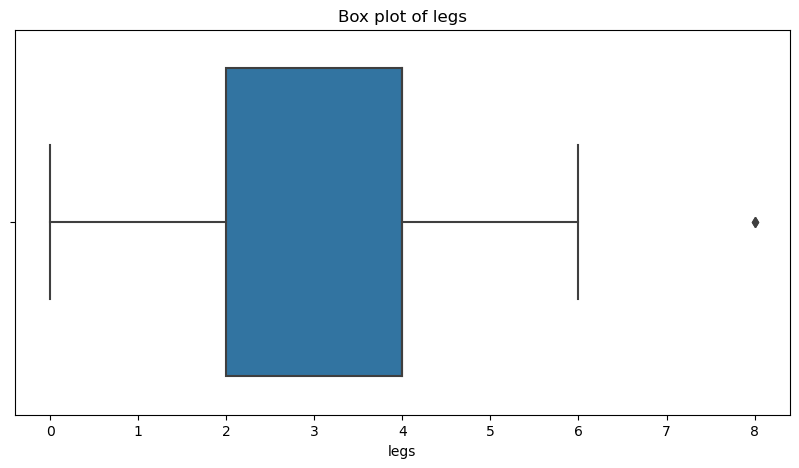

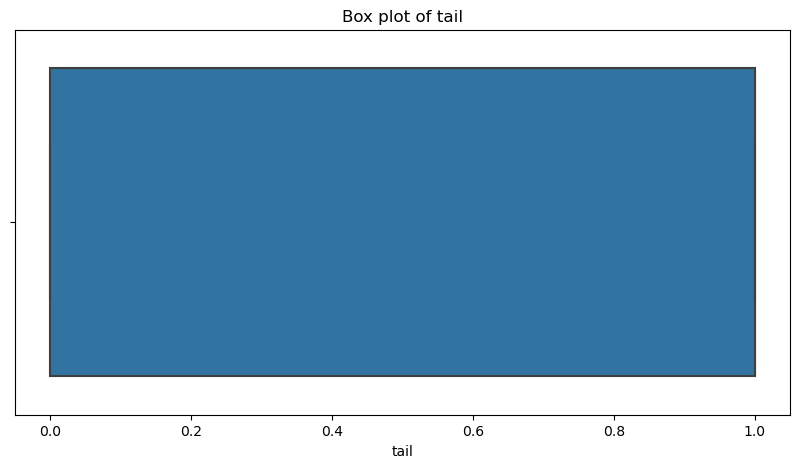

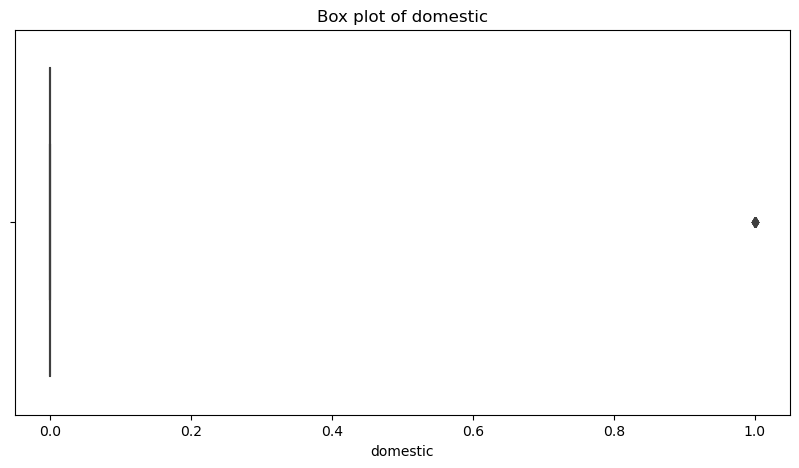

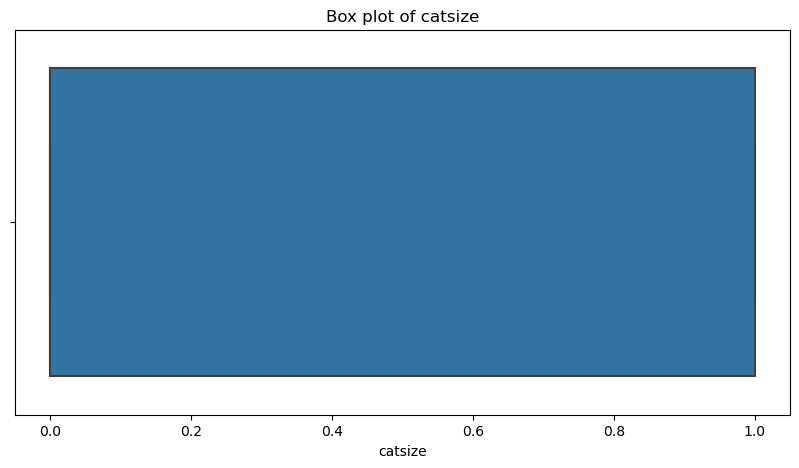

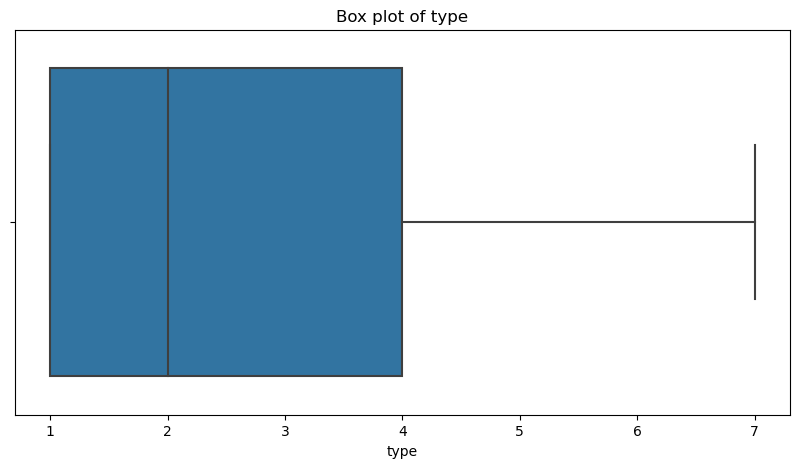

In [ ]:
numeric_features=data.select_dtypes(include=['int64','float64']).columns
for feature in numeric_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=data[feature])
    plt.title(f"Box plot of {feature}")
    plt.show()

# IQR

In [ ]:
for feature in numeric_features:
    Q1=data[feature].quantile(0.25)
    Q3=data[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    data[feature]=np.where(data[feature]<lower_bound,lower_bound,data[feature])
    data[feature]=np.where(data[feature]>upper_bound,upper_bound,data[feature])

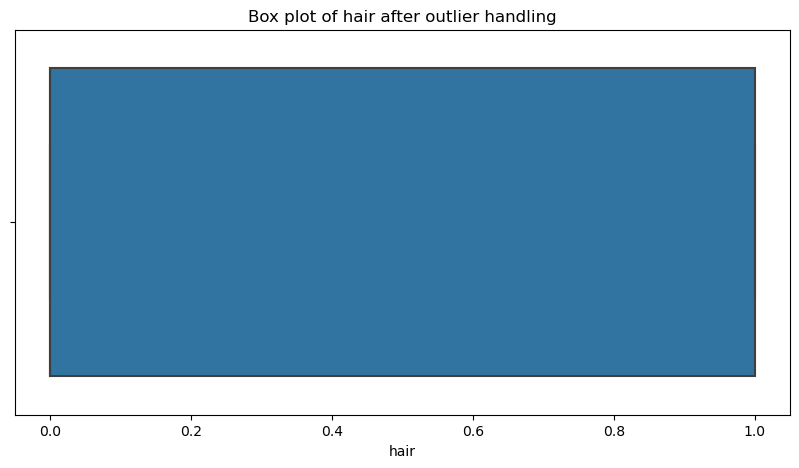

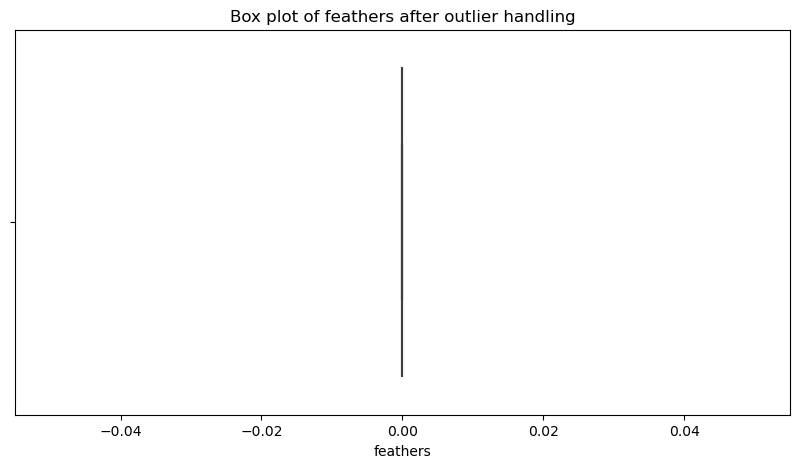

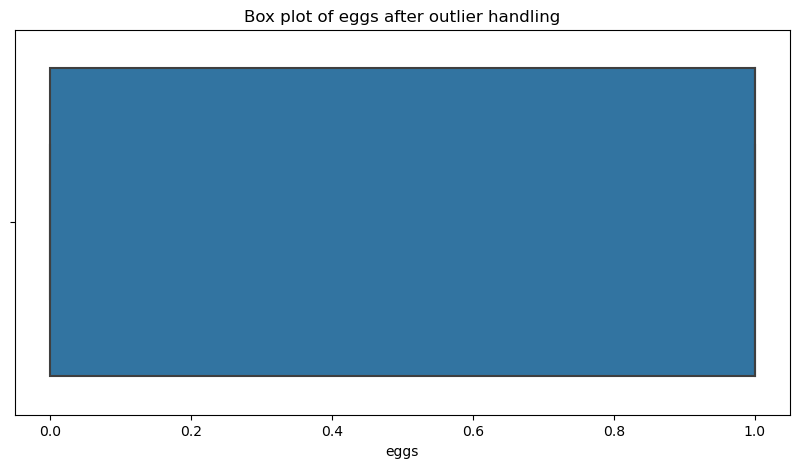

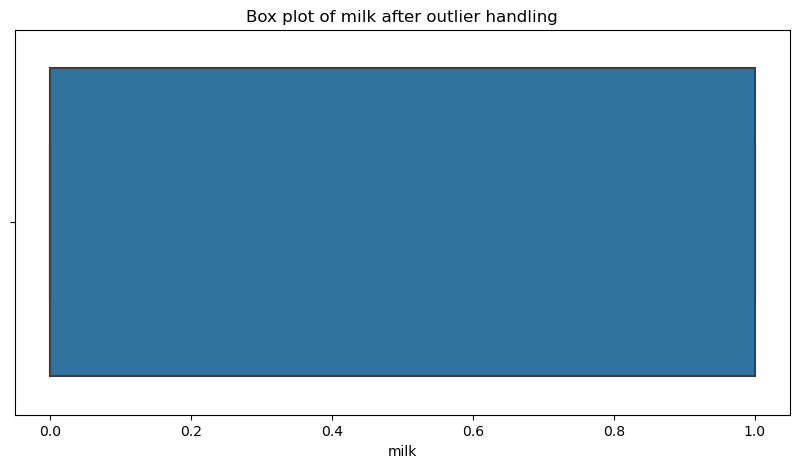

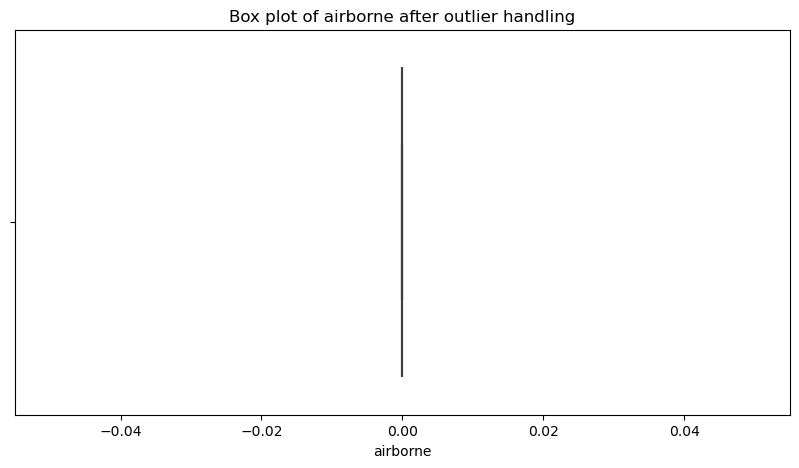

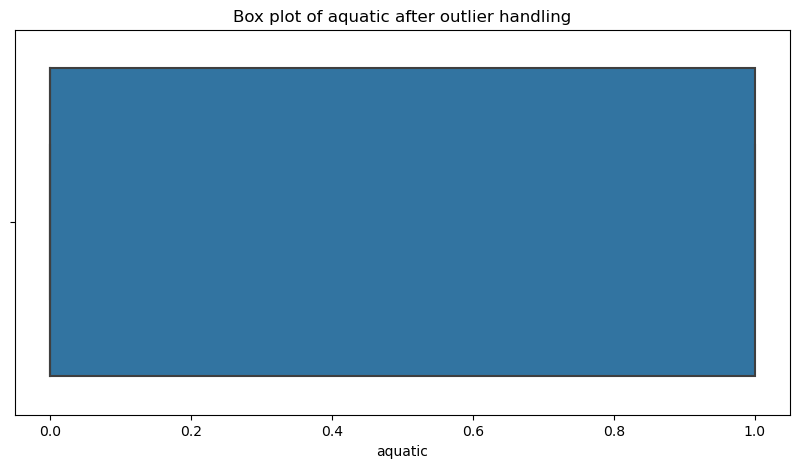

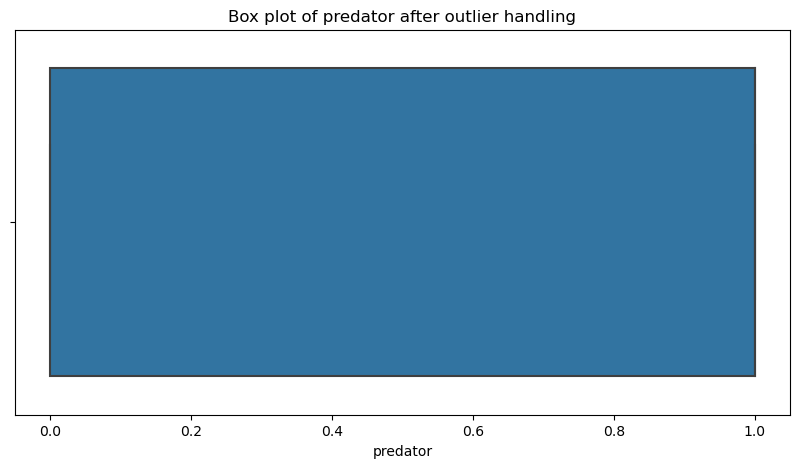

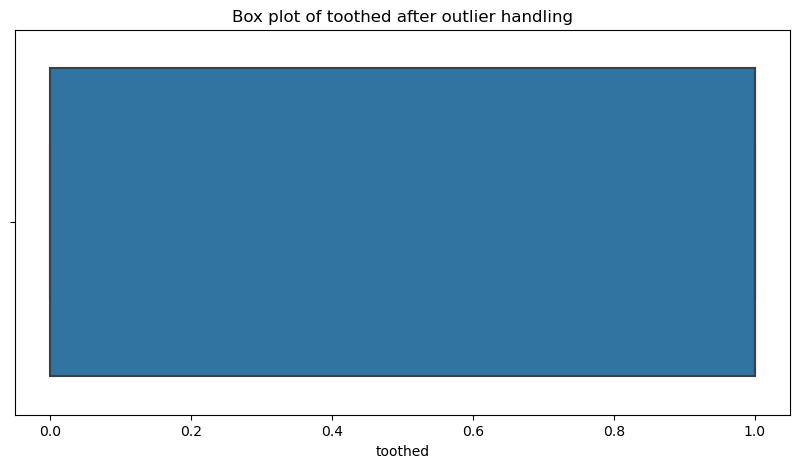

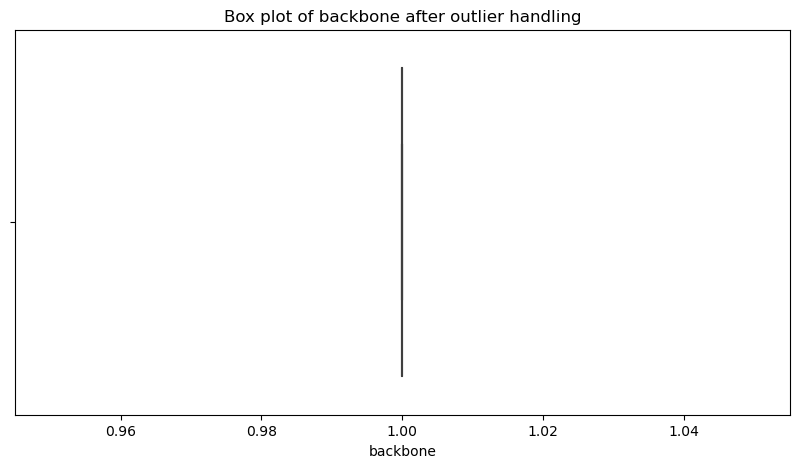

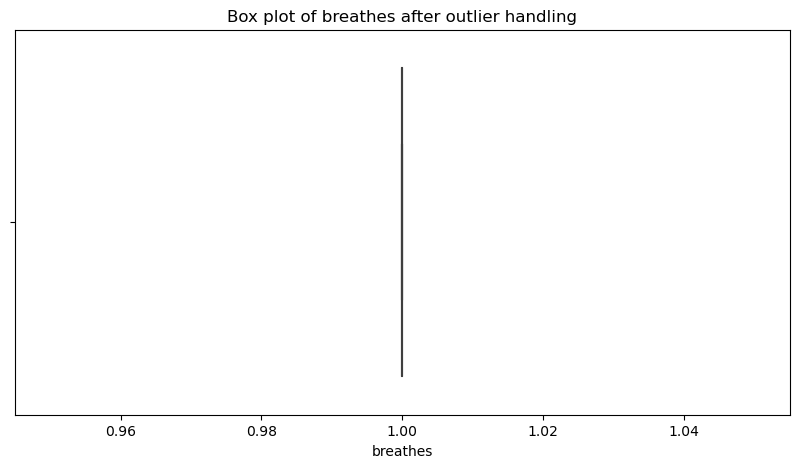

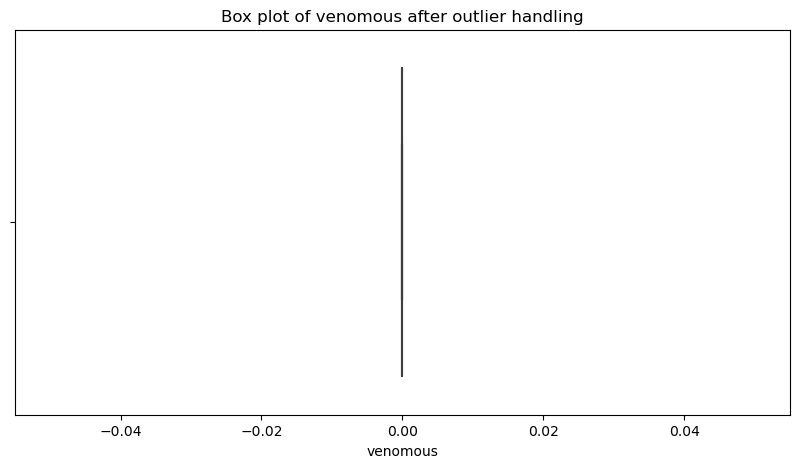

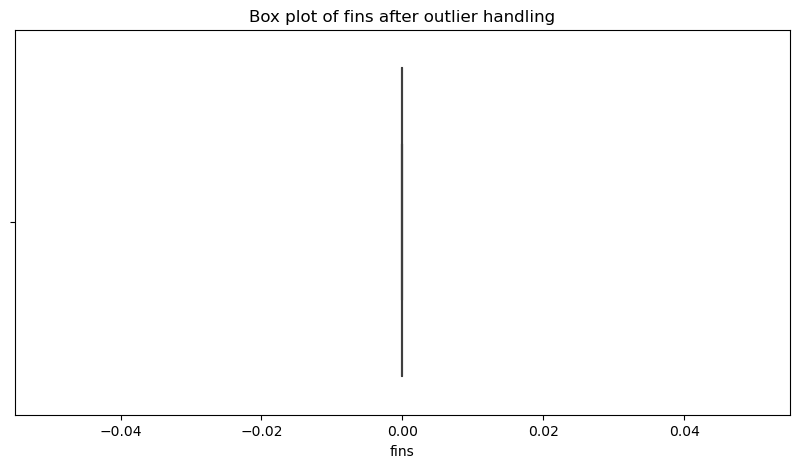

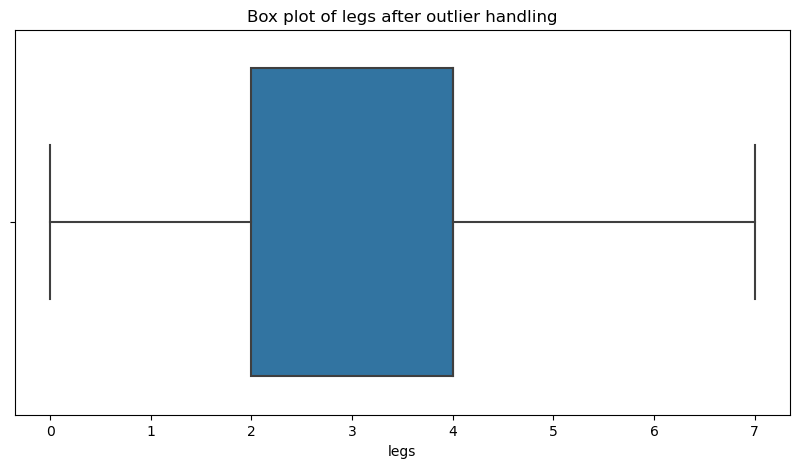

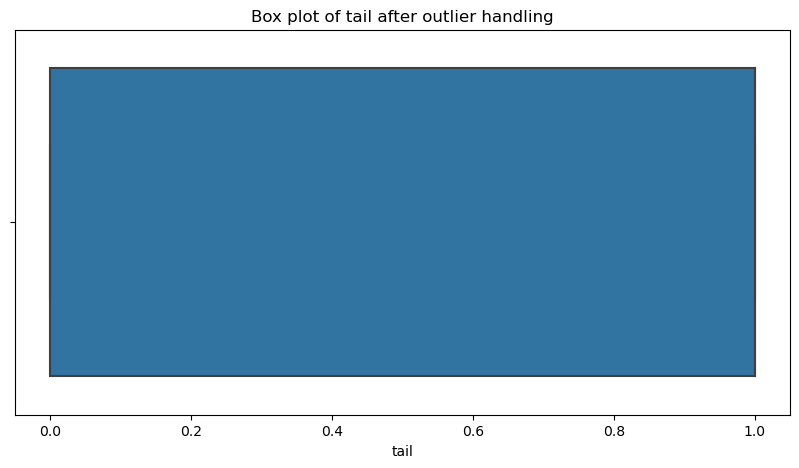

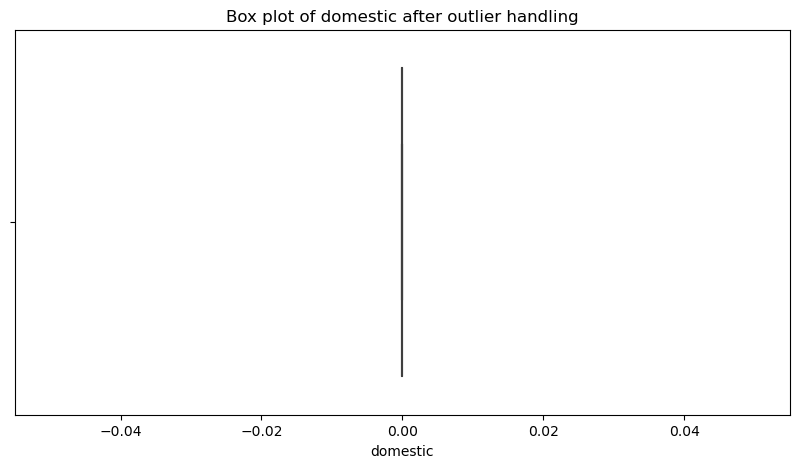

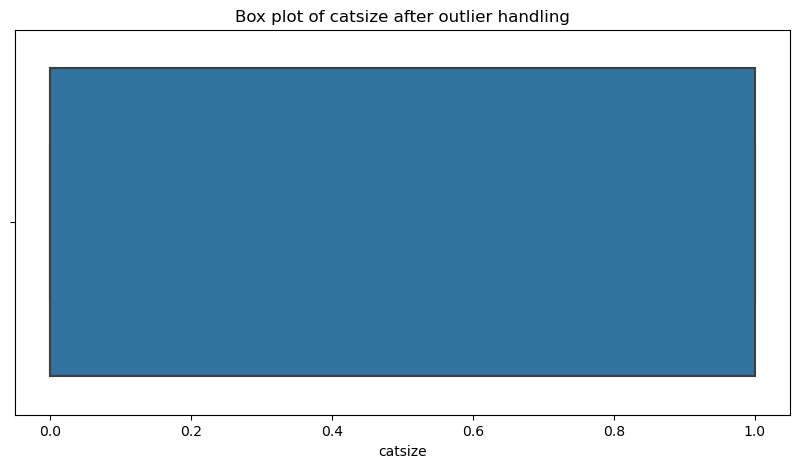

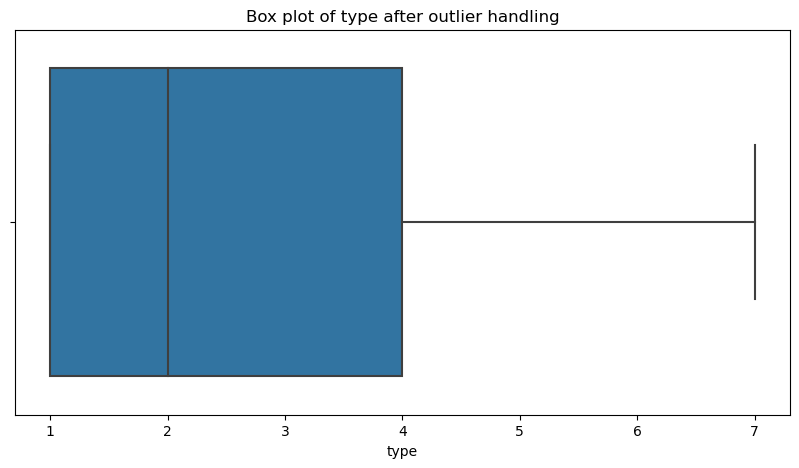

In [ ]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature])
    plt.title(f'Box plot of {feature} after outlier handling')
    plt.show()


# Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data=data.drop(columns=['animal name'])

In [ ]:
X=data.drop(columns=['type'])
y=data['type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Traning set size:",X_train.shape)
print("Testing set size:",X_test.shape)

Traning set size: (80, 16)
Testing set size: (21, 16)


# K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      0.92      0.96        12
         2.0       1.00      1.00      1.00         2
         3.0       0.00      0.00      0.00         1
         4.0       0.40      1.00      0.57         2
         6.0       1.00      1.00      1.00         3
         7.0       0.00      0.00      0.00         1

    accuracy                           0.86        21
   macro avg       0.57      0.65      0.59        21
weighted avg       0.85      0.86      0.84        21

Confusion Matrix:
 [[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  1  0  0]]


# Visualize the Decision Boundaries

Visualizing the decision boundaries can help us understand how the K-NN classifier is making decisions. Note that this visualization works best with datasets that have two features. If you have more than two features, you can use dimensionality reduction techniques like PCA to reduce the feature space to two dimensions.

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [ ]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [ ]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF', '#FF0000', '#00FF00', '#0000FF']

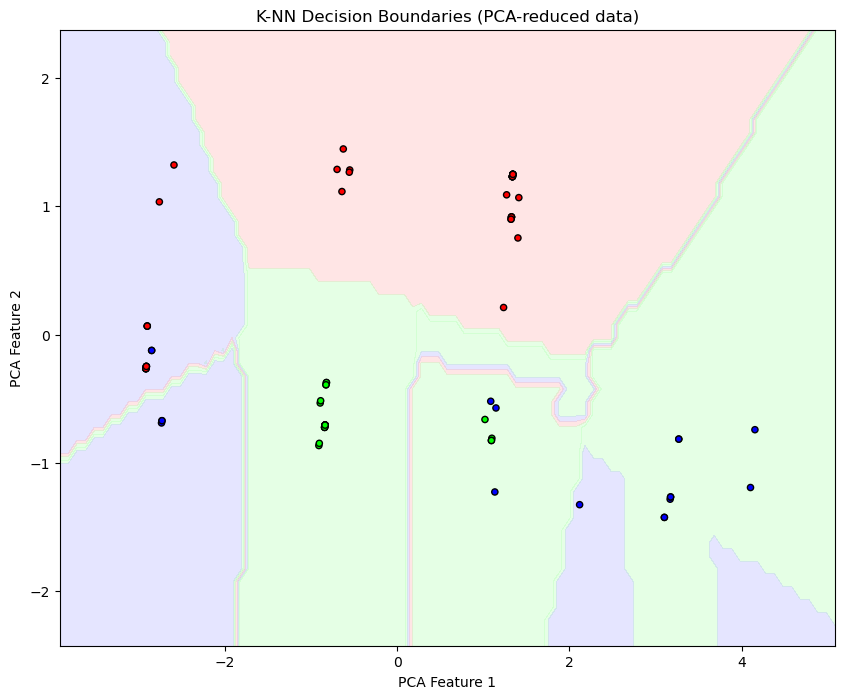

In [ ]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', s=20, cmap=ListedColormap(cmap_bold))
plt.title('K-NN Decision Boundaries (PCA-reduced data)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

# Evaluate

In [ ]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"K={k}:")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


K=1:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00         2
         3.0       0.00      0.00      0.00         1
         4.0       0.67      1.00      0.80         2
         6.0       1.00      1.00      1.00         3
         7.0       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
K=2:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00         2
         3.0       0.00      0.00      0.00         1
         4.0       0.67      1.00      0.80         2
         6.0       1.00      1.00      1.00      

# Interview Questions:


What are the key hyperparameters in KNN?

The key hyperparameters in K-Nearest Neighbours (K-NN) include the number of neighbors \( K \), the distance metric, and the weighting function. The number of neighbors \( K \) determines how many neighboring points will influence the classification of a given data point. The distance metric, such as Euclidean, Manhattan, or Minkowski, dictates how the distance between data points is calculated. The weighting function can be uniform, where all neighbors are equally weighted, or distance-based, where closer neighbors have more influence on the classification. Tuning these hyperparameters is crucial for optimizing the performance of the K-NN algorithm.

What distance metrics can be used in KNN?

In K-Nearest Neighbours (K-NN), several distance metrics can be employed to measure the similarity or dissimilarity between data points. The most commonly used metric is the Euclidean distance, which calculates the straight-line distance between two points in space. Another popular metric is the Manhattan distance (also known as L1 distance), which measures the distance between points along the axes at right angles. Minkowski distance is a generalization of both Euclidean and Manhattan distances, where a parameter \( p \) determines the metric: \( p = 1 \) corresponds to Manhattan distance, and \( p = 2 \) corresponds to Euclidean distance. Other metrics like Chebyshev distance, which considers the maximum absolute difference in any dimension, and Hamming distance, particularly useful for categorical data, can also be used depending on the nature of the dataset and the problem at hand. Each metric can significantly affect the performance of the K-NN classifier, so choosing the appropriate one is crucial.